## Blobs in 2D Datasets Notebook

Testing my algorithms on 2D generated datasets with centers approaching together.

In [45]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot
from scipy.spatial import distance

from bc_utils import TestDf

Creating datasets and saving them to pandas dataframes.

In [46]:
cluster_deviations = list(range(1, 10))
dataset_dfs = []
for std_deviation in cluster_deviations:
    X, y = make_blobs(n_samples=250, centers=2, cluster_std=std_deviation,
                      n_features=2)
    new_dataframe = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    new_dataframe = new_dataframe
    dataset_dfs.append(new_dataframe)
    

Showing plots of the datasets.

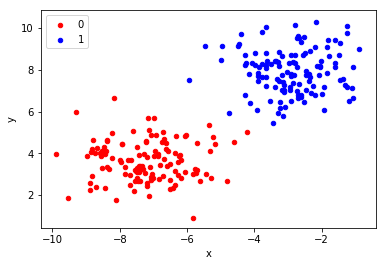

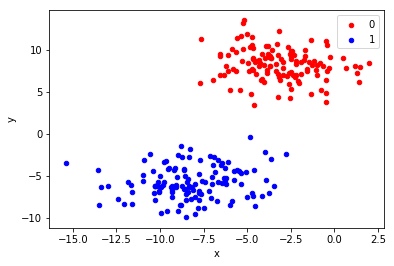

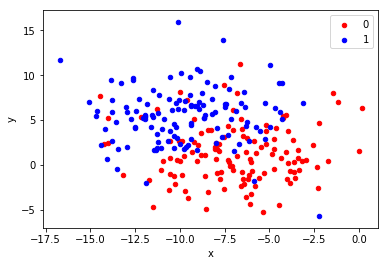

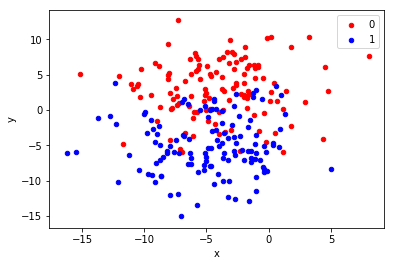

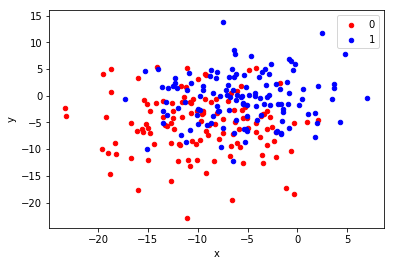

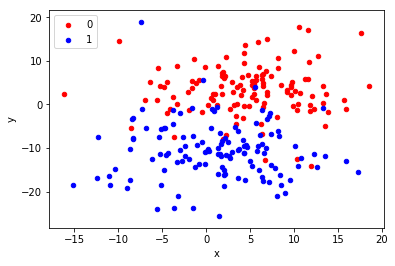

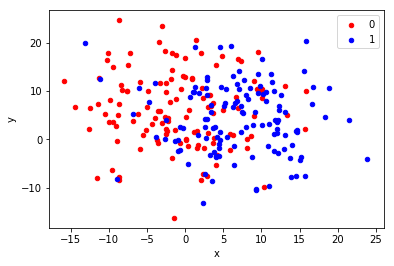

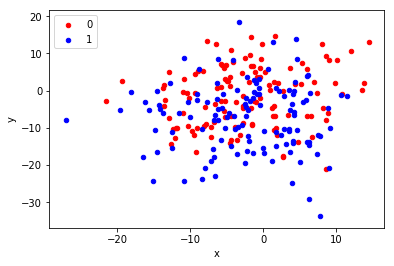

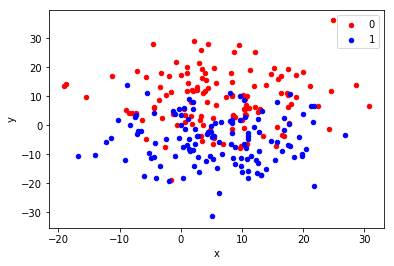

In [47]:
colors = {0:'red', 1:'blue'}
for df in dataset_dfs:
    fix, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y',
                   label=key, color=colors[key])
    pyplot.show()

Separating datasets to learn and test parts. Using own class TestDataset from utils.py

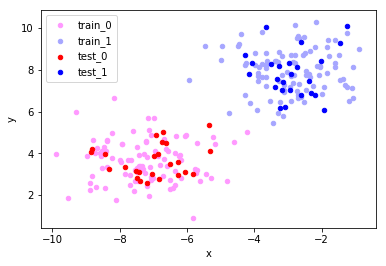

In [48]:
dataset = dataset_dfs[0]      

#creating dataset for testing algorithms
learning_dataset = TestDf(dataset)

learning_dataset.show_plot()

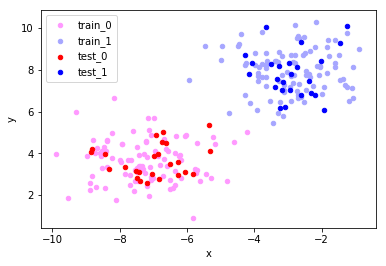

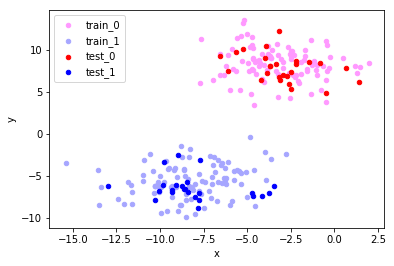

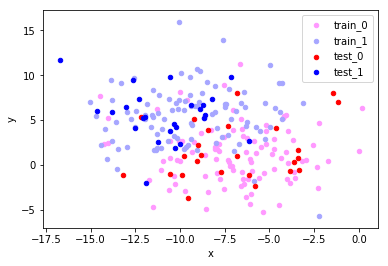

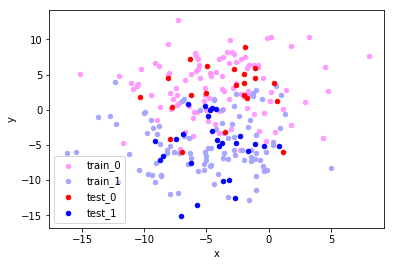

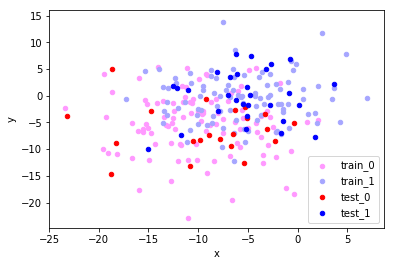

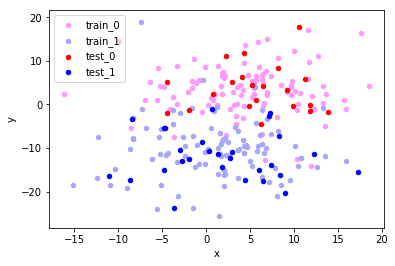

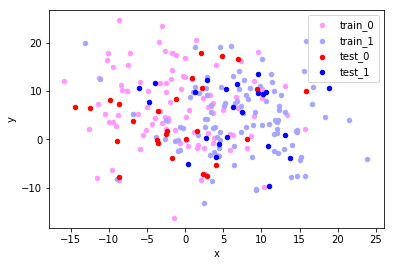

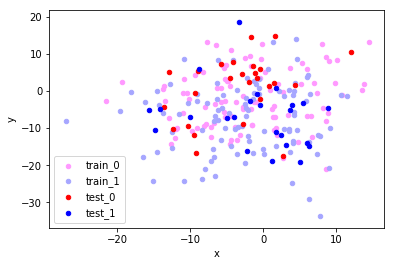

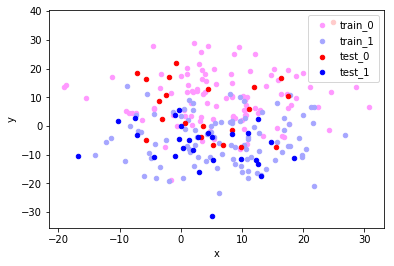

In [49]:
learning_datasets = []
for dataset in dataset_dfs:
    learning_datasets.append(TestDf(dataset))
    
for ldataset in learning_datasets:
    ldataset.show_plot()

Datagram for 0


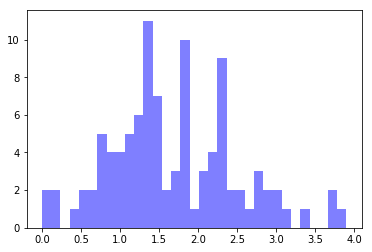

Mean distance for this dataset: 1.6736606333147819

Datagram for 1


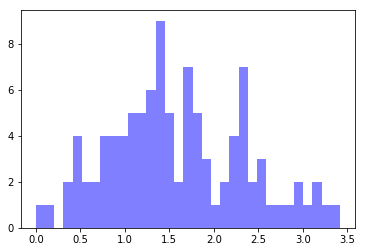

Mean distance for this dataset: 1.5922838574475444

Datagram for 0


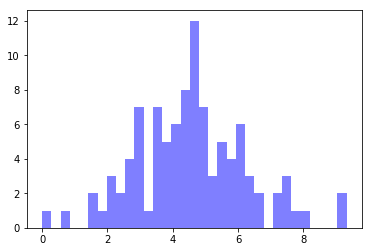

Mean distance for this dataset: 4.564075318428655

Datagram for 1


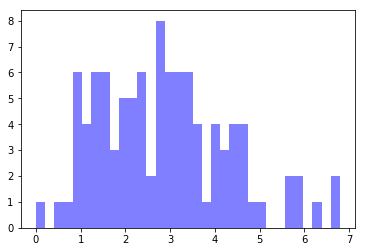

Mean distance for this dataset: 2.8607924951061454

Datagram for 0


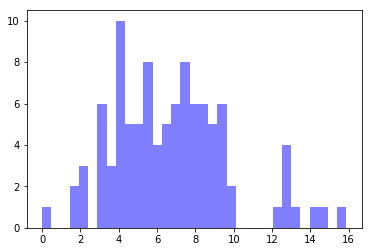

Mean distance for this dataset: 6.7105390878790425

Datagram for 1


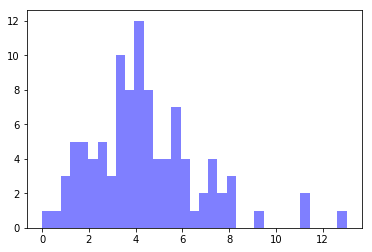

Mean distance for this dataset: 4.376205635835585

Datagram for 0


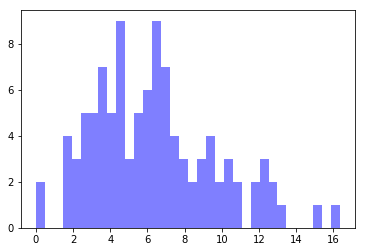

Mean distance for this dataset: 6.328824411816367

Datagram for 1


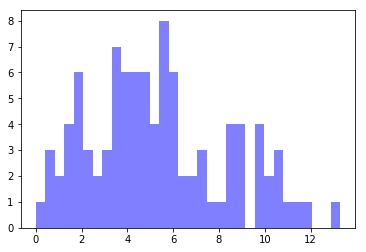

Mean distance for this dataset: 5.3521659429536985

Datagram for 0


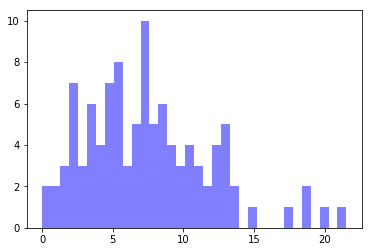

Mean distance for this dataset: 7.458089954773342

Datagram for 1


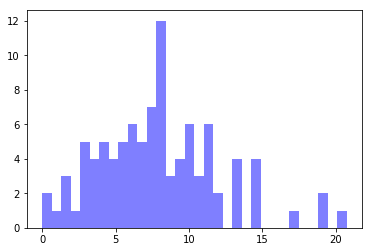

Mean distance for this dataset: 7.981001494600176

Datagram for 0


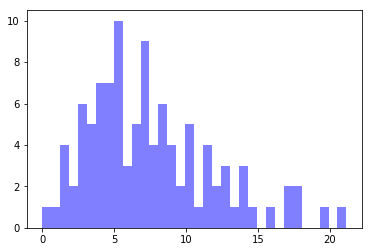

Mean distance for this dataset: 7.562377266010279

Datagram for 1


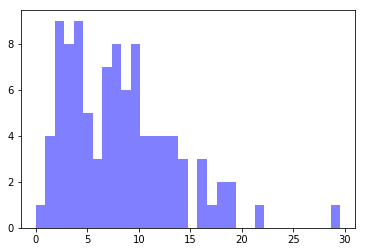

Mean distance for this dataset: 8.26072304920454

Datagram for 0


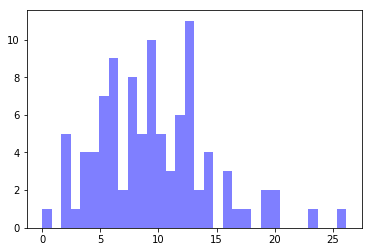

Mean distance for this dataset: 9.56479303076849

Datagram for 1


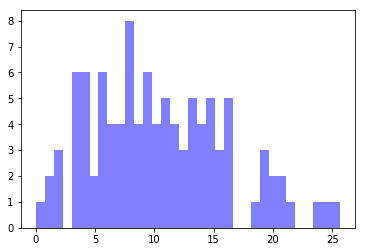

Mean distance for this dataset: 10.402800647540161

Datagram for 0


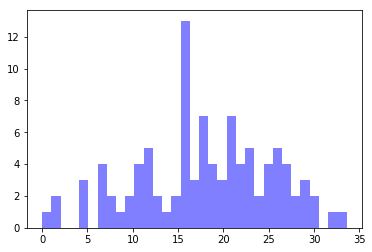

Mean distance for this dataset: 17.87949806231537

Datagram for 1


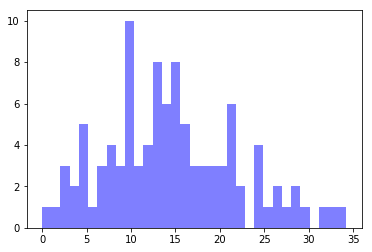

Mean distance for this dataset: 14.605451609839896

Datagram for 0


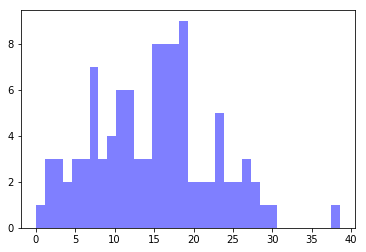

Mean distance for this dataset: 14.866825672946009

Datagram for 1


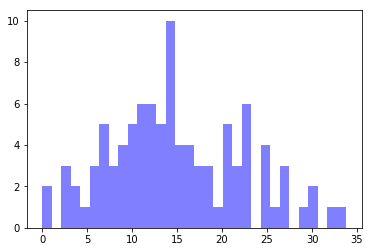

Mean distance for this dataset: 14.943196774692943



In [115]:
# shows histograms based on distance from first point in dataset
def training_histogram(in_df):
    base_point = in_df.values[0]

    vals = in_df.values
    histogram_data = []
    for item in vals:
        histogram_data.append(distance.euclidean(
            [base_point[1], base_point[2]],
            [item[1], item[2]]))

    #for i in range(10, 60, 10):
    bins = len(histogram_data) / 3
    pyplot.hist(histogram_data, bins, facecolor='blue', alpha=0.5)
    pyplot.show()
    
    mean_distance = np.mean(histogram_data)
    print("Mean distance for this dataset: " + str(mean_distance) + "\n")
    return mean_distance

# finding representation of a cluster with random selection
# pandas.DataFrame in_df
# float delta
def randomSelection(in_df, delta):
    
    medoid_indexes = []
    index_list = list(in_df.index.values)
    
    while (index_list):
        #print("Index length: " + str(len(index_list)))
        # select first unvisited index
        ind = in_df.loc[index_list[0]].name
        #print("Selected index for this run: " + str(ind))
        ref_point = [in_df.loc[ind].values[1], in_df.loc[ind].values[2]]
        rem_indexes = []
        #print("Lenght of in_df: " + str(len(in_df)))
        
        # find indexes to drop from dataframe
        for index, row in in_df.iterrows():
            if distance.euclidean([row['x'], row['y']], ref_point) <= delta:
                rem_indexes.append(index)
        
        index_list = [item for item in index_list if item not in rem_indexes]
        #print("Droping these indexes: " + str(rem_indexes))
        rem_indexes.remove(ind)
        medoid_indexes.append(ind)
        
        in_df = in_df.drop(rem_indexes)
        #print("These indexes remain in in_df: " + str(in_df.index.values))
        
    return in_df
            

for df in learning_datasets: #[0:1]:
    
    print("Datagram for 0")
    mean_0 = training_histogram(df.train_df.loc[df.train_df["label"] == 0])
    medoid_0 = randomSelection(df.train_df.loc[df.train_df["label"] == 0], mean_0)
    
    print("Datagram for 1")
    mean_1 = training_histogram(df.train_df.loc[df.train_df["label"] == 1])
    medoid_1 = randomSelection(df.train_df.loc[df.train_df["label"] == 1], mean_1)